## Trabajo Visualización de datos UDD:

Objetivos:


Alumnos:

| Alumno | Email |
|--------|-------|
|Carolina Hoffman | chofmman@udd.cl |
|Wilder Prado     | wilderhp@gmail.com |
|Effry Vigorena   | effryvg@gmail.com |
|Felipe Guzmán    | felipeguzmanv@gmail.com|





In [1]:
## Librerias

import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt



import plotly as px
import plotly.graph_objs as go
import plotly.express as px
import ipywidgets as widgets
from plotly.subplots import make_subplots





In [2]:
## Data a utilizar

'''
Archivos de mapa (shape)
'''
chile_pol = gpd.read_file('../shape_chile/chile_pol.shp')
'''
Archivos de Vitamina D
'''
#data = pd.read_csv("DATOS ADD_VISUALIZACION.CSV", decimal=',')
data = pd.read_csv("https://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv",sep=';', decimal=',')
#datahttps://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv



I. Visualización de mapa

In [3]:
# Colores a ocupar en Macrozonas:
color=['#C62828', '#C62828', '#283593', '#FF9800', '#283593', '#C62828', '#283593',]
# colores Anios
color_anios = ['#b69797','#c97272','#a45050','#e6d089']

In [4]:
## orden de norte a sur
index_=[15,1,2,3,4,5,13,6,7,8,9,14,10]

In [5]:
## Limpieza de datos mapa
## Rotación del mapa
center = chile_pol["geometry"].iloc[0].centroid
chile_pol.geometry = chile_pol.rotate(96, origin=center)

## Asignación de colores mapa
chile_pol['color'] = chile_pol.MacroZona.map(lambda x: color[x-1])

## Orden de norte a sur
chile_pol.codreg=chile_pol.codreg.astype(int)

# chile_pol.head(2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/fguzman/miniconda3/envs/mdd/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


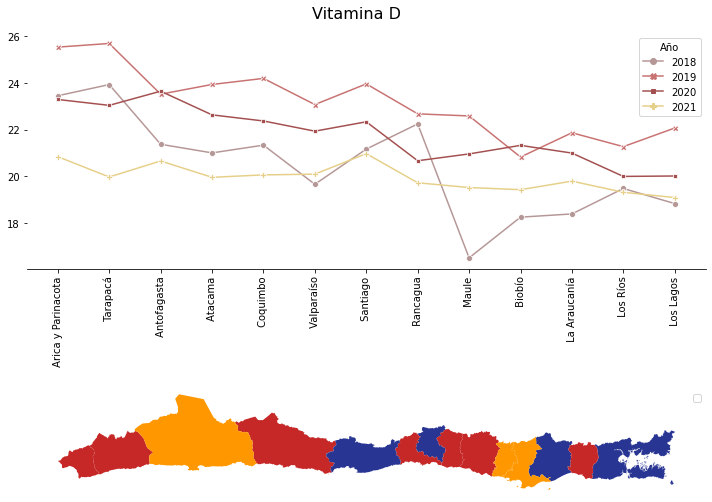

In [6]:
## Preparación de data para grafico de tendencia

nombres = {
   ' SANTIAGO': 'Región Metropolitana de Santiago',
   ' LA SERENA':'Región de Coquimbo',
   ' VALDIVIA': 'Región de Los Ríos',
   ' ANTOFAGASTA': 'Región de Antofagasta',
   ' PUERTO MONTT': 'Región de Los Lagos',
   ' ILLAPEL':'Región de Coquimbo',
   ' RANCAGUA':"Región del Libertador General Bernardo O'Higgins",
   ' CONCEPCION': 'Región del Biobío',
   ' OVALLE':'Región de Coquimbo',
   ' LOS ANDES': 'Región de Valparaíso',
   ' VIÑA DEL MAR':'Región de Valparaíso',
   ' VALLENAR':'Región de Atacama',
   ' TEMUCO':'Región de La Araucanía',
   ' COPIAPO':'Región de Atacama',
   ' ARICA':'Región de Arica y Parinacota',
   ' CALAMA':'Región de Antofagasta', 
   ' IQUIQUE':'Región de Tarapacá',
   'TALCA': 'Región del Maule'
}
codigos = {
   ' SANTIAGO': 13,
   ' LA SERENA':4,
   ' VALDIVIA': 14,
   ' ANTOFAGASTA': 2,
   ' PUERTO MONTT': 10,
   ' ILLAPEL':4,
   ' RANCAGUA':6,
   ' CONCEPCION': 8,
   ' OVALLE':4,
   ' LOS ANDES': 5,
   ' VIÑA DEL MAR':5,
   ' VALLENAR':3,
   ' TEMUCO':9,
   ' COPIAPO':3,
   ' ARICA':15,
   ' CALAMA':2, 
   ' IQUIQUE':1,
   'TALCA': 7
}
data_ = data
data_['nom_reg'] = data_.LABORATORIO.map(lambda x: nombres.get(x))
data_['cod_reg'] = data_.LABORATORIO.map(lambda x: codigos.get(x))

data__ = data_.pivot_table(index='nom_reg',columns='Año', values='VITAMINA D', aggfunc={'VITAMINA D':np.mean}).reset_index().set_index('nom_reg')
data__ = pd.merge(data__, chile_pol[['nom_reg','codreg']], how='left', left_on='nom_reg', right_on='nom_reg')
# data__ = data__.loc[index_,:]
data__=data__.set_index('codreg')
data__=data__.loc[index_,:]
data__
data_plot = data__.set_index('nom_reg').unstack().reset_index().rename(columns={'level_0':'Año',0:'Promedio'})

data_plot.nom_reg = data_plot.nom_reg.map(lambda x: x.replace('Región del',''))
data_plot.nom_reg = data_plot.nom_reg.map(lambda x: x.replace('Región de',''))
data_plot.nom_reg = data_plot.nom_reg.map(lambda x: x.replace('Región',''))
data_plot.nom_reg = data_plot.nom_reg.map(lambda x: x.replace("Libertador General Bernardo O'Higgins",'Rancagua'))
data_plot.nom_reg = data_plot.nom_reg.map(lambda x: x.replace("Metropolitana de Santiago",'Santiago'))

fig, ax = plt.subplots(2,1, figsize=(10,8))
from matplotlib.gridspec import GridSpec

fig.suptitle("Vitamina D", fontsize=16)
ax[0]=sns.lineplot(
    data= data_plot,
    x='nom_reg',
    y='Promedio',
    hue='Año',
    ax=ax[0],
    markers=True,
    dashes=False,
    style='Año',
    palette=color_anios
    # axis='x', rotation=90
    
)
ax[0].tick_params(axis='x', rotation=90)
ax[0].spines['left'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set(ylabel=None)
ax[0].set(xlabel=None)

plt.legend(loc='upper right')

chile_pol[~chile_pol['codreg'].isin([12,11])].plot(column='MacroZona', 
    #categorical=True,
    ax=ax[1],
    color=chile_pol['color'],
    
    legend=True,
)
ax[1].set_axis_off()



plt.tight_layout()

plt.show()

II. Visualización sunburst

In [13]:
## Funciones a ocupar
def agregar_proporcion(grupo):    
    grupo["PROP"] = grupo['VITAMINA D'] / grupo['VITAMINA D'].sum()
    grupo["PROP_2"] = grupo['RESULTADO_VAL'] / grupo['RESULTADO_VAL'].sum()
    return grupo

    
def condicion(x):
    x=int(x)
    if x<30:
        return "Deficiente"
    else:
        return "Deseable"
    

def retornarMes(x):
    return mesesDic[str(x)]

def update(year,zona):
  global df_filter

  fig = make_subplots(
    rows=2, cols=1,
    row_heights = [0.2, 0.8],
    specs=[[ {"type": "domain"}],
           [ {"type": "domain"}]])
 
  if zona !="ALL":
    df = df_filter.query(f"MACROZONA == '{zona.upper()}'")
  else:
    df = df_filter
    
  if year !="ALL":
    df = df.query(f"AÑO == {year}")

  
  # Treemap
  fig.add_trace(
    px.treemap(df,values="PROP",color = "ESTACIONES_AÑO",path = ['MACROZONA','ESTACIONES_AÑO','VIT_D_TXT'],hover_name = "MACROZONA").data[0],
    row=1, col=1
    
    )

  # Sunburts
  fig2 = px.sunburst(df, path=['AÑO',"VIT_D_TXT", 'ADULTO_NIÑO'], values='RESULTADO_VAL')

  fig.add_trace(
      go.Figure(go.Sunburst(
        labels=fig2['data'][0]['labels'],
        parents=fig2['data'][0]['parents'],
        values=fig2['data'][0]['values'],
        ids=fig2['data'][0]['ids'],
        branchvalues='total',
        marker=dict(colorscale='YlOrRd'),
        hovertemplate='<b>%{label}:</b> <br> Total : %{value} <extra></extra>',
        maxdepth=4
      )).data[0], row=2, col=1)
  
  fig2.update_traces(textinfo="label+percent parent")

  fig.update_layout(
    template="plotly_white",
    margin=dict(r=0, t=0, b=0, l=0),
    height = 800,
    #width = 1200,
      
  )
  fig.update_traces(textinfo="label+percent root") 
  
  fig.show()

dropdown_año = widgets.Dropdown(
    value='ALL', 
    options=['ALL','2018', '2019', '2020', '2021'], 
    description='Año :'
)

dropdown_zona = widgets.Dropdown(
    value='ALL', 
    options=['ALL','Norte', 'Centro', 'Sur'], 
    description='Zona :'
)

In [14]:
## Preparación de datos
# Para definir los resultados de la vitamina en base a la tabla en https://tucuerpomehabla.com/la-vitamina-d-clave-en-nuestro-bienestar/
data.columns = data.columns.str.upper()
data['VITAMINA D'] = data['VITAMINA D'].astype(float)
data['RESULTADO_VAL']= 1
data['VIT_D_TXT'] = data['VITAMINA D'].apply(condicion)
# data

df_filter = data.groupby(['AÑO','VIT_D_TXT','ADULTO_NIÑO']).apply(agregar_proporcion)
# df_filter


result_x=df_filter.groupby(['AÑO','MACROZONA','ESTACIONES_AÑO','ADULTO_NIÑO','VIT_D_TXT']).PROP_2.sum().reset_index()
widgets.interact(update, year = dropdown_año, zona=dropdown_zona)


interactive(children=(Dropdown(description='Año :', options=('ALL', '2018', '2019', '2020', '2021'), value='AL…

<function __main__.update(year, zona)>